In [5]:
2 ** 100

1267650600228229401496703205376

In [6]:
import time

In [15]:
지역 = input("어디 사는 가요? ")
print("{}에 살고 계시는 군요.".format(지역))

어디 사는 가요? seoul
seoul에 살고 계시는 군요.


In [9]:
print("hello")
time.sleep(5)  # 5초 딜레이
print("world")

hello
world


# Pandas 맛보기

In [17]:
import pandas as pd

pd.__version__

'0.23.4'

In [24]:
df_list = pd.read_html('https://finance.naver.com/marketindex/exchangeList.nhn')
df = df_list[0]
df.columns = [
    '통화명', '매매기준율', '현찰 - 사실 때', '현찰 - 파실 때',
    '송금 - 보내실 때', '송금 - 받으실 때', '미화환산율',
]
df = df.set_index('통화명')
print(df.shape)
df.head()  # 상위 5행만 보기

(44, 6)


매매기준율  현찰 - 사실 때  현찰 - 파실 때  송금 - 보내실 때  송금 - 받으실 때  미화환산율
통화명                                                                        
미국 USD         1142.90    1162.90    1122.90     1154.10     1131.70  1.000
유럽연합 EUR       1283.42    1308.96    1257.88     1296.25     1270.59  1.123
일본 JPY (100엔)  1026.26    1044.21    1008.31     1036.31     1016.21  0.898
중국 CNY          169.94     178.43     161.45      171.63      168.25  0.149
홍콩 HKD          145.60     148.46     142.74      147.05      144.15  0.127

In [25]:
df.to_excel("환율.xlsx")

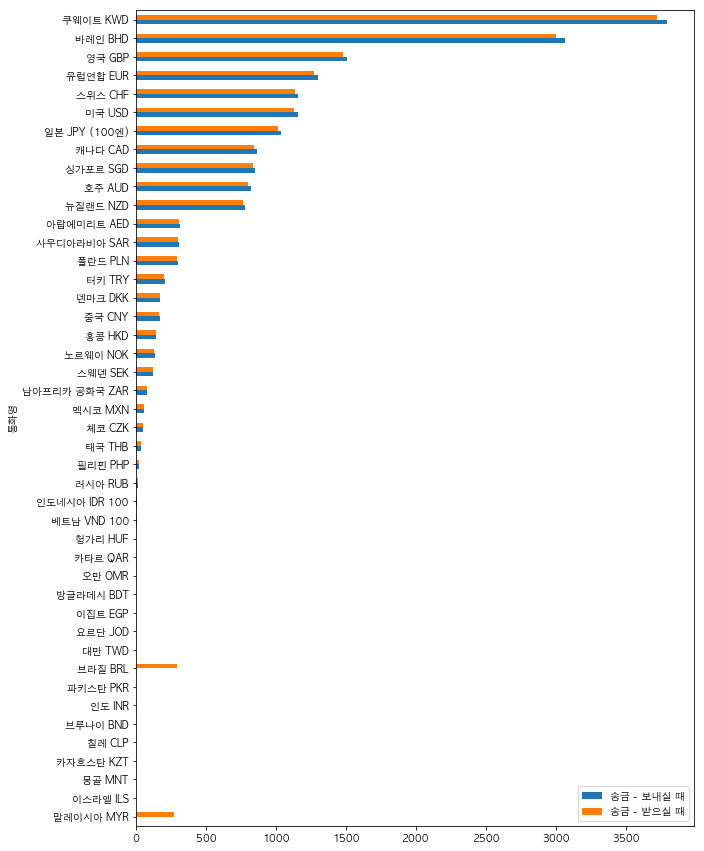

In [34]:
%matplotlib inline
from matplotlib import rc
from matplotlib import pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

rc('font', family='Malgun Gothic') # Windows 일 경우
# rc('font', family='AppleGothic') # Mac 일 경우

df2 = df.sort_values('송금 - 보내실 때', ascending=True)

names = ['송금 - 보내실 때', '송금 - 받으실 때']
df2[names].plot(kind='barh', figsize=(10, 15))

# Pandas 기본 자료구조

In [ ]:
학생성적 = [
    ['철수', 100, 90, 80],
    ['영희', 90, 70, 100],
]

## Series

In [37]:
mylist = [1, 2, 3, 1, 2, 3, 1, 2]
set(mylist)

{1, 2, 3}

In [38]:
series1 = pd.Series(['사과', '바나나', '딸기'])
series1

0     사과
1    바나나
2     딸기
dtype: object

In [39]:
series2 = pd.Series(['사과', '바나나', '딸기'],
                    index=[3, 2, 3])
series2

3     사과
2    바나나
3     딸기
dtype: object

In [41]:
pd.Series({3: '사과', 2: '바나나', 3: '딸기'})

3     딸기
2    바나나
dtype: object

In [44]:
series2[3]

3    사과
3    딸기
dtype: object

In [45]:
series2[2]

'바나나'

# 인터넷 데이터 읽어보기

In [46]:
코스닥_csv_url = "https://goo.gl/3p3bSG"
코피스_csv_url = "https://goo.gl/aUHznC"

In [52]:
df = pd.read_csv(코스닥_csv_url)
print(df.shape)
df.head()  # 상위 5행

(1231, 2)


종목명    종목코드
0     제일홀딩스    3380
1  하나금융9호스팩  261200
2    교보7호스팩  267320
3      보라티알  250000
4    한화수성스팩  265920

In [55]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df['종목명'].head()  # 한 컬럼

0       제일홀딩스
1    하나금융9호스팩
2      교보7호스팩
3        보라티알
4      한화수성스팩
Name: 종목명, dtype: object

In [58]:
df.loc[3]

종목명       보라티알
종목코드    250000
Name: 3, dtype: object

## index 지정

In [63]:
df = pd.read_csv(코스닥_csv_url, index_col='종목명')
print(df.shape)
df.head()  # 상위 5행

(1231, 1)


종목코드
종목명             
제일홀딩스       3380
하나금융9호스팩  261200
교보7호스팩    267320
보라티알      250000
한화수성스팩    265920

In [64]:
# df2 = df.set_index('종목명')
df.loc['보라티알']

종목코드    250000
Name: 보라티알, dtype: int64

In [65]:
df.columns

Index(['종목코드'], dtype='object')

In [66]:
df.index

Index(['제일홀딩스', '하나금융9호스팩', '교보7호스팩', '보라티알', '한화수성스팩', '매일유업', '삼양옵틱스',
       'IBKS제6호스팩', '필옵틱스', '미래에셋대우스팩1호',
       ...
       '에이티넘인베스트', '대동기어', '피에스텍', '코센', '카스', '하이록코리아', 'SBI인베스트먼트', '엠벤처투자',
       '제미니투자', '모헨즈'],
      dtype='object', name='종목명', length=1231)